<a href="https://colab.research.google.com/github/kmalicekim/NLP_practice_mine/blob/master/8.%20%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 8.2 감성 사전을 이용한 영화 리뷰 감성 분석

### 8.2.1 NLTK 영화 리뷰 데이터 준비 

In [1]:
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

print('#review count:', len(movie_reviews.fileids()))  # 영화 리뷰 문서의 id를 반환
print('#samples of file ids:', movie_reviews.fileids()[:10]) # id를 10개까지만 출력
print('#categories of reviews:', movie_reviews.categories()) # label, 즉 긍정인지 부정인지에 대한 분류
print('#num of "neg" reviews:', len(movie_reviews.fileids(categories='neg')))  # label이 부정인 문서들의 id 반환
print('#num of "pos" reviews:', len(movie_reviews.fileids(categories='pos')))  # label이 긍정인 문서들의 id 반환

fileid = movie_reviews.fileids()[0] # 첫번째 문서의 id를 반환 
print("#id of the first review:", fileid)
print('#part of the first review:', movie_reviews.raw(fileid)[:500]) # 첫번째 문서의 내용을 500자까지만 출력
print('#sentiment of the first review:', movie_reviews.categories(fileid)) # 첫번째 문서의 감성

fileids = movie_reviews.fileids()  # movie_reviews data 에서 file id를 가져옴
reviews = [movie_reviews.raw(fileid) for fileid in fileids] # file id를 이용해 raw text file를 가져옴
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


#review count: 2000
#samples of file ids: ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
#categories of reviews: ['neg', 'pos']
#num of "neg" reviews: 1000
#num of "pos" reviews: 1000
#id of the first review: neg/cv000_29416.txt
#part of the first review: plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt
#sentiment of the first review: ['neg']


### 8.2.2 TextBlob을 이용한 감성 분석

In [2]:
!pip install -U textblob
!python -m textblob.download_corpora

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 15.8 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [9]:
# ex
print(reviews[0])
print()
print(reviews[1])

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

In [10]:
from textblob import TextBlob 

# 감성분석의 결과는 sentiment 속성으로 확인 가능 
# sentiment는 polarity 와 subjectivity로 구성됨
# polarity : 감성을 나타내는 극성. -1 과 1 사이의 실숫값
# subjectivity : 0과 1 사이의 실수. 0에 가까울수록 객관적, 1에 가까울수록 주관적


result = TextBlob(reviews[0])  # 첫째 리뷰에 대한 리뷰값
print(result.sentiment)  # polarity 0.06--> 매우 약한 긍정

Sentiment(polarity=0.06479782948532947, subjectivity=0.5188408350908352)


In [15]:
# 현재 데이터는 실수가 아닌 pos, neg로 극성을 표현하므로, 
# 텍스트 리스트를 받아서 polarity의 결과를 데이터에 맞게 반환하는 함수 작성

def sentiment_TextBlob(docs):
  results = []

  for doc in docs:
    testimonial = TextBlob(doc)
    if testimonial.sentiment.polarity > 0:
      results.append('pos')
    else:
      results.append('neg')
  return results 


In [16]:
from sklearn.metrics import accuracy_score 

print('#TestBlob을 이용한 리뷰 감성분석의 정확도:', accuracy_score(categories, sentiment_TextBlob(reviews))) 

# 정확도 0.6 --> 정확도가 그리 좋지 않음. 감성 사전을 기반으로 하는 감성분석의 가장 큰 문제 : 정확도가 그리 높지 않음

#TestBlob을 이용한 리뷰 감성분석의 정확도: 0.6


### 8.2.3 AFINN을 이용한 감성 분석

In [17]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=db9e943e00070f09673e16fdc89c55bc9c8cbb072dc168e80fb95b07657d4c8b
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [19]:
# TextBlob과 마찬가지로 afinn은 극성을 수치로 반환하므로 'neg', 'pos'로 변환하는 함수 작성

from afinn import Afinn 

def sentiment_Afinn(docs):
  afn = Afinn(emoticons=True)  # 대상 텍스트에 이모티콘이 포함돼 있을 경우 emoticons=True로 설정
  results = []

  for doc in docs:
    if afn.score(doc) > 0:
      results.append('pos')
    else:
      results.append('neg')
  return results

print('#Afinn을 이용한 리뷰 감성분석의 정확도:', accuracy_score(categories, sentiment_Afinn(reviews)))   #TextBlob보다는 나아진 정확도이나 여전히 별로

#Afinn을 이용한 리뷰 감성분석의 정확도: 0.664


### 8.2.4 VADER를 이용한 감성 분석

In [20]:
# VADER : 규칙 기반의 감성 분석 알고리즘 사용. 소셜 미디어의 텍스트에서 좋은 성능이 나올 수 있도록 개발됨 
# NLTK의 nltk.sentiment.vader에 포함되어 있음
# 감성 사전인 vader_lexicon을 추가로 다운받은 후 NLTK에 있는 라이브러리 사용 

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [21]:
# vader의 SentimentIntensityAnalyzer는 4개의 극성값 제공 
# 4째 극성값인 compound는 pos, neg, neu 세 값을 적절히 조합해 -1과 1 사이의 극성값 제공

from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(docs):
  analyser = SentimentIntensityAnalyzer()
  results = []

  for doc in docs:
    score = analyser.polarity_scores(doc)
    if score['compound'] > 0:
      results.append('pos')
    else:
      results.append('neg')
  
  return results

print('#Vader을 이용한 리뷰 감성분석의 정확도:', accuracy_score(categories, sentiment_vader(reviews)))

#Vader을 이용한 리뷰 감성분석의 정확도: 0.635


---

## 8.3 학습을 통한 머신러닝 기반의 감성 분석

### 8.3.1 NLTK 영화 리뷰에 대한 머신러닝 기반 감성 분석

In [22]:
from sklearn.model_selection import train_test_split   # sklearn에서 제공하는 split 함수 사용

X_train, X_test, y_train, y_test = train_test_split(reviews, categories, test_size=0.2, random_state=7) 

print('Train set count:', len(X_train))
print('Test set count:', len(X_test)) 

Train set count: 1600
Test set count: 400


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB   

# TfidfVectorizer로 TFIDF 벡터로 변환 > MultinomialNB로 나이브 베이즈 모형으로 학습하고 성능 출력
tfidf = TfidfVectorizer().fit(X_train) 

X_train_tfidf = tfidf.transform(X_train)  # train set 변환 
print('#Train set dimension:', X_train_tfidf.shape)  # 실제로 몇개의 특성이 사용되었는지 확인 

X_test_tfidf = tfidf.transform(X_test)  # test set 변환 
print('#Test set dimension:', X_test_tfidf.shape) 

NB_clf = MultinomialNB(alpha=0.01)  # 분류기 선언
NB_clf.fit(X_train_tfidf, y_train)  # train set을 이용하여 분류기(classifier)를 학습
print('#Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train)))  # train set에 대한 예측정확도 확인
print('#Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test)))     # test set에 대한 예측정확도 확인


#Train set dimension: (1600, 36189)
#Test set dimension: (400, 36189)
#Train set score: 0.998
#Test set score: 0.797


---
### 해당 결과는 감성 사전을 이용한 감성 분석에 비해 성능이 월등히 뛰어남

- 감성 사전을 이용할 경우 : 대상 말뭉치에 관계없이 일반적으로 적용

- 학습에 의한 모형 : 특정 도메인에 한정되어 더 좋은 성능을 보임

---

### 8.3.2 다음 영화 리뷰에 대한 머신러닝 기반 감성분석

In [28]:
import pandas as pd

df = pd.read_csv('/content/daum_movie_review.csv')
df.head(10)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워
5,나는 재밌게 봄,10,2018.10.14,인피니티 워
6,0.5점은 줄 수 없냐?,0,2018.10.10,인피니티 워
7,헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...,10,2018.10.08,인피니티 워
8,충격 결말,9,2018.10.06,인피니티 워
9,응집력,8,2018.10.05,인피니티 워


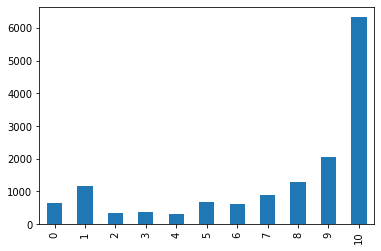

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline 

df.rating.value_counts().sort_index().plot(kind='bar') 
plt.show()

# 10점이 가장 많고, 5점을 중심으로 봤을 때 주로 더 큰 값에 많이 분포되어 있음
# 클래스별로 고르게 분포하지 않는 경우 : 불균형 데이터셋 ---> 성능이 잘 나오기가 어렵고 모형의 성능을 정확도로 측정하기 어려움
# 이와 같은 불균형 데이터에서의 성능 측정을 위해 사용하는 지표 : 정밀도 & 재현율
# 정확도 : (TP+TN) / (P+N)
# 정밀도 : TP / (TP+FN)
# 재현율 : TP / (TP+FN)

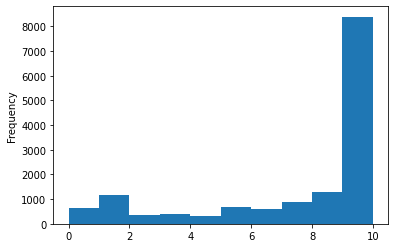

In [30]:
df.rating.plot.hist(bins=10)

In [34]:
# 학습 방법 1 : 평점을 예측하는 다중회귀분석
# 평점을 라벨로 사용하여 학습하고 평점을 예측한 후, 마지막 과정에서 긍/부정 판별 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df.review, df.rating, random_state=7) 
print('#Train set size:', len(X_train))
print('#Test set size:', len(X_test)) 

!pip install konlpy
from konlpy.tag import Okt 
okt = Okt()

# 보통 극성을 가지는 단어는 명사, 동사, 형용사이므로 토큰화에서도 이 셋만 포함 
def twit_tokenizer(text):   
  target_tags = ['Noun', 'Verb', 'Adjective']
  result = []
  
  for word, tag in okt.pos(text, norm=True, stem=True):
    if tag in target_tags:
      result.append(word) 
  return result 


tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, max_features=2000, min_df=5, max_df=0.5)
X_train_tfidf = tfidf.fit_transform(X_train) 
X_test_tfidf = tfidf.transform(X_test)


#Train set size: 11043
#Test set size: 3682
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
# LinearRegression 모듈을 이용하여 다중회귀분석 실시 
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() # 객체 생성
lr.fit(X_train_tfidf, y_train) 

print('#Regression Train set R2 score: {:.3f}'.format(lr.score(X_train_tfidf, y_train))) 
print('#Regression Test set R2 score: {:.3f}'.format(lr.score(X_test_tfidf, y_test))) 

#Regression Train set R2 score: 0.605
#Regression Test set R2 score: 0.395


In [37]:
# LinearRegression이 제공하는 score는 R2값으로, 이 척도로는 감성 분석에 대한 정확도를 알기 어려움
# 평점을 극성으로 바꿔주고 accuracy_score를 이용하여 정확도 측정 

y_train_senti = (y_train > 5) 
y_test_senti = (y_test > 5) 

y_train_predict = (lr.predict(X_train_tfidf) > 5) 
y_test_predict = (lr.predict(X_test_tfidf) > 5) 


from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score  # 정밀도(precision)와 재현율(recall)의 조화평균. F1 score값이 높으면 성능이 높다고 할 수 있음

print('#Accuracy for train set: {:.3f}'.format(accuracy_score(y_train_senti, y_train_predict)))
print('Precision for train set: {:.3f}'.format(precision_score(y_train_senti, y_train_predict))) 
print('Recall for train set:; {:.3f}'.format(recall_score(y_train_senti, y_train_predict)))
print('#F1 for train set: {:.3f}'.format(f1_score(y_train_senti, y_train_predict))) 

print() 

print('#Accuracy for test set: {:.3f}'.format(accuracy_score(y_test_senti, y_test_predict)))
print('Precision for test set: {:.3f}'.format(precision_score(y_test_senti, y_test_predict))) 
print('Recall for test set:; {:.3f}'.format(recall_score(y_test_senti, y_test_predict)))
print('#F1 for test set: {:.3f}'.format(f1_score(y_test_senti, y_test_predict))) 

# 극성에 대해서는 꽤 좋은 정확도, 정밀도, 재현율을 보임


#Accuracy for train set: 0.888
Precision for train set: 0.893
Recall for train set:; 0.969
#F1 for train set: 0.929

#Accuracy for test set: 0.848
Precision for test set: 0.868
Recall for test set:; 0.946
#F1 for test set: 0.905


In [38]:
# 학습 방법 2 : 극성을 라벨로 한 로지스틱 회귀 분석 
# 위에서 극성에 해당하는 y_train_senti, y_test_senti를 이미 구해 놓아서 이를 바로 라벨로 사용

from sklearn.linear_model import LogisticRegression 

LR_clf = LogisticRegression() 
LR_clf.fit(X_train_tfidf, y_train_senti)  

y_train_predict = LR_clf.predict(X_train_tfidf) 
y_test_predict = LR_clf.predict(X_test_tfidf) 


print('#Accuracy for train set: {:.3f}'.format(accuracy_score(y_train_senti, y_train_predict)))
print('Precision for train set: {:.3f}'.format(precision_score(y_train_senti, y_train_predict))) 
print('Recall for train set:; {:.3f}'.format(recall_score(y_train_senti, y_train_predict)))
print('#F1 for train set: {:.3f}'.format(f1_score(y_train_senti, y_train_predict))) 

print() 

print('#Accuracy for test set: {:.3f}'.format(accuracy_score(y_test_senti, y_test_predict)))
print('Precision for test set: {:.3f}'.format(precision_score(y_test_senti, y_test_predict))) 
print('Recall for test set:; {:.3f}'.format(recall_score(y_test_senti, y_test_predict)))
print('#F1 for test set: {:.3f}'.format(f1_score(y_test_senti, y_test_predict))) 


#Accuracy for train set: 0.878
Precision for train set: 0.878
Recall for train set:; 0.973
#F1 for train set: 0.923

#Accuracy for test set: 0.855
Precision for test set: 0.866
Recall for test set:; 0.958
#F1 for test set: 0.910
